# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Luci McDaniel
### GitHub: https://github.com/LuciMcD/Module7-WebScraping-McD.git 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [60]:
import spacy
import matplotlib.pyplot as plt
import pickle
import requests
from bs4 import BeautifulSoup 


## Question 1:
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

## Solution 1:

In [61]:
poem = requests.get('https://poets.org/poem/my-people')


with open('poem.pkl', 'wb') as f:
    pickle.dump(poem.text, f)

## Question 2:
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

## Solution 2:

In [62]:
from spacytextblob.spacytextblob import SpacyTextBlob
import unicodedata
poem_html = poem.text

with open('poem.pkl', 'rb') as f:
    poem_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(poem_html, parser)
extract_poem = soup.find('article')
formypeople = extract_poem.get_text()
cleaned_poem = unicodedata.normalize("NFKD", formypeople)
lines_of_formypeople = str(cleaned_poem.split("\n"))

print(lines_of_formypeople)


#printing the polarity score 
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(lines_of_formypeople)

polarity = doc._.blob.polarity
print("The polarity score of FOR MY PEOPLE is ", round(polarity, 2))

#printing the number of sentences
poem_lines = soup.find_all('p')
total_lines = len(poem_lines)
print("The number of lines in the poem:",total_lines)




['', '', '', 'For My People', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Add to anthology', '', '×', '', '', '', '', '', '', '', '', '', '', '', 'Margaret Walker', '', '', '1915 – ', '1998', '', '', '', '', 'For my people everywhere singing their slave songs     repeatedly: their dirges and their ditties and their blues       and jubilees, praying their prayers nightly to an     unknown god, bending their knees humbly to an     unseen power;', 'For my people lending their strength to the years, to the      gone years and the now years and the maybe years,    washing ironing cooking scrubbing sewing mending    hoeing plowing digging planting pruning patching     dragging along never gaining never reaping never    knowing and never understanding;', 'For my playmates in the clay and dust and sand of Alabama     backyards playing baptizing and preaching and doctor    and jail and soldier and s

## Question 3:
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

## Solution 3:

In [63]:
#removing whitespace, punctuation, and stop words
def clean_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)
#finding the most common tokens
common_tokens = [token.text.lower() for token in doc if clean_token(token)]
print("The most common tokens in FOR MY PEOPLE are; ", common_tokens)
#counting the most common tokens and printing the frequency
from collections import Counter
frequency = Counter(map(str, common_tokens))
print("The frequency of these tokens are; ", frequency.most_common(5))

The most common tokens in FOR MY PEOPLE are;  ['people', 'add', 'anthology', '×', 'margaret', 'walker', '1915', '1998', 'people', 'singing', 'slave', 'songs', 'repeatedly', 'dirges', 'ditties', 'blues', 'jubilees', 'praying', 'prayers', 'nightly', 'unknown', 'god', 'bending', 'knees', 'humbly', 'unseen', 'power', 'people', 'lending', 'strength', 'years', 'gone', 'years', 'years', 'maybe', 'years', 'washing', 'ironing', 'cooking', 'scrubbing', 'sewing', 'mending', 'hoeing', 'plowing', 'digging', 'planting', 'pruning', 'patching', 'dragging', 'gaining', 'reaping', 'knowing', 'understanding', 'playmates', 'clay', 'dust', 'sand', 'alabama', 'backyards', 'playing', 'baptizing', 'preaching', 'doctor', 'jail', 'soldier', 'school', 'mama', 'cooking', 'playhouse', 'concert', 'store', 'hair', 'miss', 'choomby', 'company', 'cramped', 'bewildered', 'years', 'went', 'school', 'learn', 'know', 'reasons', 'answers', 'people', 'places', 'days', 'memory', 'bitter', 'hours', 'discovered', 'black', 'poor

## Question 4:
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

## Solution 4:

In [64]:
lemmas =  [token.lemma_.lower() for token in doc if clean_token(token)]
lemmas_freq = Counter(lemmas)
most_common_lemmas = lemmas_freq.most_common(5)
print("The lemmas in FOR MY PEOPLE are;", lemmas)
print("The frequency of the 5 most common lemmas are;", most_common_lemmas)

The lemmas in FOR MY PEOPLE are; ['people', 'add', 'anthology', '×', 'margaret', 'walker', '1915', '1998', 'people', 'singe', 'slave', 'song', 'repeatedly', 'dirge', 'ditty', 'blue', 'jubilee', 'pray', 'prayer', 'nightly', 'unknown', 'god', 'bend', 'knee', 'humbly', 'unseen', 'power', 'people', 'lend', 'strength', 'year', 'go', 'year', 'year', 'maybe', 'year', 'wash', 'iron', 'cooking', 'scrub', 'sewing', 'mending', 'hoeing', 'plow', 'dig', 'plant', 'prune', 'patching', 'drag', 'gain', 'reap', 'know', 'understand', 'playmate', 'clay', 'dust', 'sand', 'alabama', 'backyard', 'play', 'baptize', 'preaching', 'doctor', 'jail', 'soldier', 'school', 'mama', 'cooking', 'playhouse', 'concert', 'store', 'hair', 'miss', 'choomby', 'company', 'cramp', 'bewildered', 'year', 'go', 'school', 'learn', 'know', 'reason', 'answer', 'people', 'place', 'day', 'memory', 'bitter', 'hour', 'discover', 'black', 'poor', 'small', 'different', 'care', 'wonder', 'understand', 'boy', 'girl', 'grow', 'spite', 'thing

## Question 5:
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Solution 5:

#### Part 1: Defiing the poem line length, and score_line_by_token

In [72]:
top_tokens = set()
for common_tokens, freq in frequency.most_common(10):
    top_tokens.add(common_tokens)
print(top_tokens)


lines = list(doc.sents)
print(lines)

def line_length(line):
    count = 0
    for token in line:
        if token.text.lower() in top_tokens:
            count += 1
    return count 

def score_line_by_token(line, top_tokens):
    token_count = sum(1 for token in line if token in top_tokens)
    len_line = line_length(line)
    token_score = token_count/len_line if len_line !=0 else 0.0
    return token_score
print("The line lenght is:", line_length(lines[1]))
print("The token score for that line is:", round(score_line_by_token(lines[1], top_tokens),5))

{'songs', 'new', 'people', 'dirges', 'walker', 'strength', 'let', 'margaret', 'unseen', 'years'}
[['', '', '', 'For My People', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Add to anthology', '', '×', '', '', '', '', '', '', '', '', '', '', '', 'Margaret Walker', '', '', '1915 – ', '1998', '', '', '', '', 'For my people everywhere singing their slave songs     repeatedly: their dirges and their ditties and their blues       and jubilees, praying their prayers nightly to an     unknown god, bending their knees humbly to an     unseen power;', 'For my people lending their strength to the years, to the      gone years and the now years and the maybe years,    washing ironing cooking scrubbing sewing mending    hoeing plowing digging planting pruning patching     dragging along never gaining never reaping never    knowing and never understanding;', 'For my playmates in the clay and dust and sand

#### Part 2: Creating a list of token scores

In [75]:
token_scores = []
for line in lines:
    token_scores.append(score_line_by_token(line, top_tokens))

print(token_scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### Part 3: Creating a histogram of token_scores

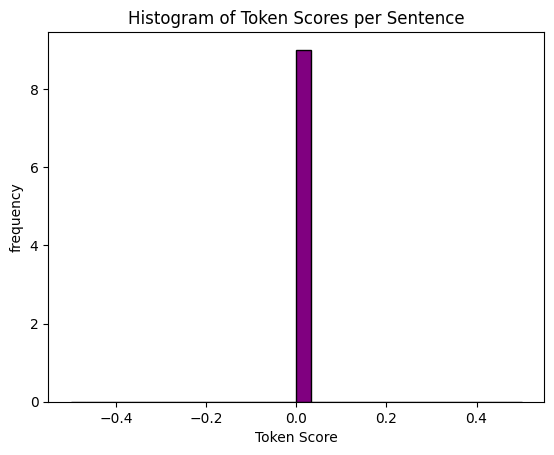

In [74]:
plt.hist(token_scores, bins=30, color='purple', edgecolor='black')
plt.xlabel('Token Score')
plt.ylabel('frequency')
plt.title('Histogram of Token Scores per Sentence')
plt.show()

## Question 6:
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Solution 6:

#### Part 1: Defining score_line_by_lemma

In [76]:
most_common_lemmas = set()
for lemma, freq in lemmas_freq.most_common(5):
    most_common_lemmas.add(lemma)
print(most_common_lemmas)

def score_line_by_lemma(line, most_common_lemmas):
    count = 0
    for lemma in line:
        if lemma.text.lower() in most_common_lemmas:
            count+=1
    len_line = line_length(line)
    lemma_score = count/len_line if len_line !=0 else 0.0
    return lemma_score
print(score_line_by_lemma(lines[2], most_common_lemmas))

{'year', 'new', 'school', 'let', 'people'}
1.0


#### Part 2: Creating a list of lemma_scores

In [77]:
lemma_scores = []
for line in lines:
    lemma_scores.append(score_line_by_lemma(line, most_common_lemmas))

print(lemma_scores)

[0.6296296296296297, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 0.0, 0.0]


#### Part 3: Creating a histogram of lemma_scores

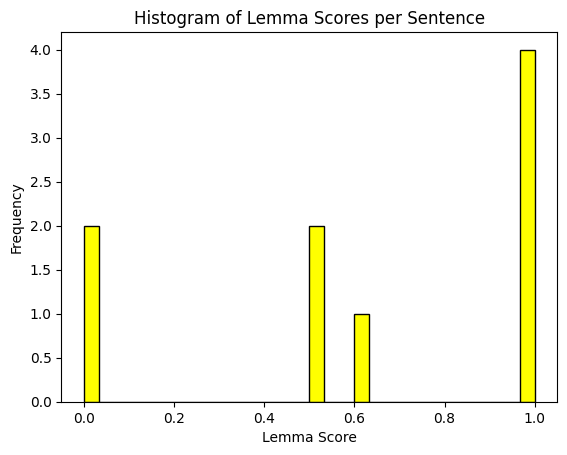

In [78]:
plt.hist(lemma_scores, bins=30, color='yellow', edgecolor='black')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.title('Histogram of Lemma Scores per Sentence')
plt.show()

## Question 7:
7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Question 8:
8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Solution 8:

## Question 9:
9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Solution 9:

## Question 10:
10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Solution 10:

## Question 11:
11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Solution 11:

## Question 12:
12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

## Question 13:
13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?